In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [3]:
buildings_path = '..\shapefiles\\building_block_people_WGS_2.csv'
schedule = 'scheduled' 
logistics = 'random'
n_collection = 1
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
i=2
while i < 100:
    n_regen = i
    Total_Energy_m3, Total_GHG_m3 = Run_LCA_model(buildings_path, n_regen, n_collection, schedule, logistics)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    i = i+10

KeyboardInterrupt: 

In [4]:
Result_Energy_m3

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,Logistics_collect,n_facilities
0,8.405088,0.001101,3.68634,0.000220,0.004062,0.000440,35.337386,0.052314,0.000440,0.947219,0.011007,6.523153,0.013579,2
0,8.405088,0.003393,3.68634,0.000679,0.004181,0.001357,14.597740,0.045954,0.001357,0.947219,0.033933,5.341739,0.020603,12
0,8.405088,0.006103,3.68634,0.001221,0.004280,0.002441,9.860403,0.051898,0.002441,0.947219,0.061035,5.290881,0.019968,22
0,8.405088,0.008909,3.68634,0.001782,0.004348,0.003563,8.405033,0.058365,0.003563,0.947219,0.089087,5.346371,0.030918,32
0,8.405088,0.011745,3.68634,0.002349,0.004422,0.004698,6.515247,0.067054,0.004698,0.947219,0.117455,5.359881,0.034378,42
0,8.405088,0.014530,3.68634,0.002906,0.004436,0.005812,6.774033,0.063155,0.005812,0.947219,0.145303,5.425832,0.040073,52
0,8.405088,0.018346,3.68634,0.003669,0.004523,0.007339,5.030999,0.065993,0.007339,0.947219,0.183464,5.410635,0.042101,62
0,8.405088,0.019663,3.68634,0.003933,0.004533,0.007865,6.496315,0.054736,0.007865,0.947219,0.196627,5.468221,0.047036,72
0,8.405088,0.022416,3.68634,0.004483,0.004609,0.008966,4.171370,0.060013,0.008966,0.947219,0.224157,5.420531,0.052792,82


In [5]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]

Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

In [ ]:
Result_Energy_m3=pd.read_csv('Energy_result_unscheduled.csv')
Result_GHG_m3=pd.read_csv('GHG_result_unscheduled.csv')

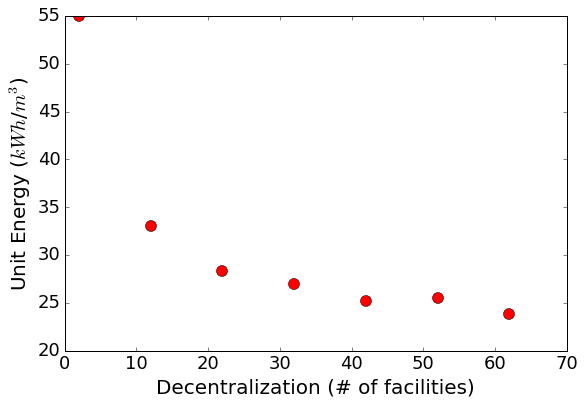

In [6]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,70)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

In [ ]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

In [7]:
Result_Energy_m3_plot = Result_Energy_m3[1:2].drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3[1:2].drop('sum',1).drop('n_facilities',1)

In [8]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Unnamed: 0','Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Unnamed: 0', 'Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1,2, 1)
a=Result_Energy_m3_plot.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,2, 2)
b=Result_GHG_m3_plot.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(-0.1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
fig.tight_layout()